In [1]:
import os
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from rDLSpp import IOfuncs as iof
from rDLSpp import RheoConfig as rconf
from rDLSpp import RheoCorr as rcorr
from rDLSpp import FTrheo as ft
from DSH import SharedFunctions as sf

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.WARNING)
logging.info('LoadRheoData tutorial started')

C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
INFO:root:LoadRheoData tutorial started


This tutorial explains how to load and analyze oscillatory rheology experiments

In [2]:
froot = r'D:\steaime\Data\RheoSALS\250507_newRheo_Ortho\04_Weekend'
rheo_protocol = rconf.RheoProtocol(froot, 'Config_Rheo.ini', 'expLog.txt')
print(rheo_protocol)

INFO:root:2249 rows read from expLog file D:\steaime\Data\RheoSALS\250507_newRheo_Ortho\04_Weekend\expLog.txt


<RheoProtocol (223 intervals)>


In [3]:
list_names = rheo_protocol.GetFullFilenames()
list_names

['D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_000a_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_000a_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_001a_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_001a_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_002a_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_002a_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_003a_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_003a_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_004a_POS.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_FlowCurve_004a_NEG.txt',
 'D:\\steaime\\Data\\RheoSALS\\250507_newRheo_Ortho\\04_Weekend\\01_Fl

In [4]:
rheo_explog = rheo_protocol.LoadExpLog()
rheo_explog

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,1,0.233438,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.021869,0.231185,12.0008,13.0008,0.00357524,-0.0185141,0,1,1,1
1,1,0.467239,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.251402,0.464812,13.0008,12.0008,-0.0166173,0.0219382,0,1,1,1
2,2,0.800024,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.501586,0.797157,12.0008,13.0008,0.0196051,-0.0169698,0,1,1,1
3,2,1.0916,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.81273,1.08839,13.0008,12.0008,-0.0148717,0.0233985,0,1,1,1
4,3,1.54417,4,01_FlowCurve_002,<err>,1,3.16228,<err>,0,1,...,1.13411,1.5402,12.0008,13.0008,0.0193197,-0.0180609,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,21,1220.47,0,223_Relax_020,<err>,0.01,0.0628319,1,0,1,...,1217.31,1220.44,12.0021,12.0021,0.0004532,0.000856044,0,1,1,1
2244,225,1630.95,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,1220.82,1630.91,12.0021,12.0021,0.000553911,0.00194708,0,1,1,1
2245,225,2041.35,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,1631.25,2041.3,12.0021,12.0021,0.00177923,0.000772118,0,1,1,1
2246,225,2451.8,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,2041.68,2451.76,12.0021,12.0021,0.000604266,0.00208136,0,1,1,1


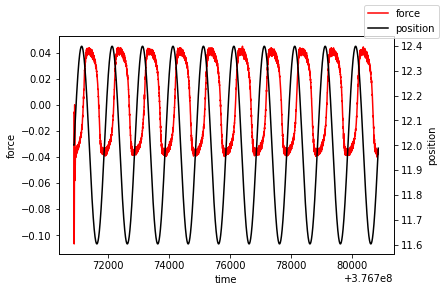

In [5]:
fidx = 50
int_time, int_pos, int_force = iof.ReadRheoData(list_names[fidx], usecols=(1, 5, 6), unpack=True)
if int_pos is not None:
    fig, ax = plt.subplots()
    ax.plot(int_time, int_force, 'r-', label='force')
    ax.set_xlabel('time')
    ax.set_ylabel('force')
    ax2 = ax.twinx()
    ax2.plot(int_time, int_pos, 'k-', label='position')
    ax2.set_ylabel('position')
    fig.legend()


In [6]:
rheo_explog

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,1,0.233438,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.021869,0.231185,12.0008,13.0008,0.00357524,-0.0185141,0,1,1,1
1,1,0.467239,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.251402,0.464812,13.0008,12.0008,-0.0166173,0.0219382,0,1,1,1
2,2,0.800024,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.501586,0.797157,12.0008,13.0008,0.0196051,-0.0169698,0,1,1,1
3,2,1.0916,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.81273,1.08839,13.0008,12.0008,-0.0148717,0.0233985,0,1,1,1
4,3,1.54417,4,01_FlowCurve_002,<err>,1,3.16228,<err>,0,1,...,1.13411,1.5402,12.0008,13.0008,0.0193197,-0.0180609,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,21,1220.47,0,223_Relax_020,<err>,0.01,0.0628319,1,0,1,...,1217.31,1220.44,12.0021,12.0021,0.0004532,0.000856044,0,1,1,1
2244,225,1630.95,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,1220.82,1630.91,12.0021,12.0021,0.000553911,0.00194708,0,1,1,1
2245,225,2041.35,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,1631.25,2041.3,12.0021,12.0021,0.00177923,0.000772118,0,1,1,1
2246,225,2451.8,2,224_Step_AX1_OSR0.04,<err>,1,<err>,100,0,1,...,2041.68,2451.76,12.0021,12.0021,0.000604266,0.00208136,0,1,1,1


Analysis routines

In [38]:
def find_namebase(fpath, ret_suffix=False):
    cur_fname = os.path.basename(fpath)[:-4]
    suff = ''
    if cur_fname[-4:] in ['_POS', '_NEG']:
        suff = cur_fname[-5:]
        cur_fname = cur_fname[:-4]
    else: 
        suff = cur_fname[-1:]
    if ret_suffix:
        return cur_fname[:-1], suff
    else:
        return cur_fname[:-1]

def find_file_params(fname):
    cur_namebase, suffix = find_namebase(fname, ret_suffix=True)
    find_params = rheo_explog[rheo_explog['Name'].str.contains(cur_namebase)]
    if len(find_params)==1:
        return find_params.iloc[0]
    elif len(find_params)>0:
        if suffix[-3:] == 'POS':
            return find_params.iloc[0]
        elif suffix[-3:] == 'NEG':
            return find_params.iloc[1]
        else:
            return None
    else:
        return None

def proc_file(fpath, anal_type='read', anal_params={}):
    find_params = find_file_params(fpath)
    if find_params is not None:
        if int(find_params['Axis'])==1:
            cur_straincol = 5
        else:
            cur_straincol = 2
        if anal_type in ['read', 'plot']:
            t, strain, stress = iof.ReadRheoData(fpath, usecols=(1, cur_straincol, 6), unpack=True)
        if anal_type=='count':
            return 1
        elif anal_type=='read':
            return t, strain, stress
        elif anal_type=='plot':
            ax = anal_params['ax']
            ax[0].plot(t-t[0], strain)
            ax[1].plot(t-t[0], stress)
        elif anal_type=='FT':
            G, opt = ft.FTanalysisRheology(fpath, Period=float(find_params['Period']), AnalyzePeriods=anal_params['nperiods'], 
                                         FreqRecord=None, usecols=(1,cur_straincol,6))
            opt['StartedOn'] = float(find_params['StartedOn'])
            opt['Displacement'] = float(find_params['Displacement'])
            opt['Period'] = float(find_params['Period'])
            opt['Offset'] = float(find_params['Offset'])
            return opt
        elif anal_type=='flowcurve':
            d_range = anal_params['displ_range']
            if strain[-1 ]
    else:
        if anal_type=='count':
            return 0
        else:
            return None

def proc_files(fpath_list, filter_type=None, filter_axis=None, filter_name=None, max_num=None, anal_type='read', anal_params={}):
    res = []
    anal_params = anal_params
    proc_count = 0
    if anal_type=='plot':
        cycle_num = proc_files(fpath_list, filter_type=filter_type, filter_axis=filter_axis, anal_type='count', max_num=max_num)
        fig, ax = plt.subplots()
        ax2 = ax.twinx()
        ax.set_prop_cycle(color=plt.cm.cool(np.linspace(0,1,cycle_num)))
        ax2.set_prop_cycle(color=plt.cm.summer(np.linspace(0,1,cycle_num)))
        anal_params['ax'] = [ax, ax2]
        ax.set_xlabel('time [s]')
        ax.set_ylabel('displacement [mm]')
        ax2.set_ylabel('force [N]')
    for i in range(len(fpath_list)):
        cur_fname = fpath_list[i]
        find_params = find_file_params(cur_fname)
        if find_params is None:
            logging.debug('Skipping file {0}/{1}: no match found in parameter table for filename "{2}"'.format(i, len(fpath_list), cur_fname))
        else:
            do_process = True
            if filter_type is not None:
                do_process = (int(find_params['Type']) == filter_type)
            if do_process and filter_axis is not None:
                do_process = (int(find_params['Axis']) == filter_axis)
            if do_process and filter_name is not None:
                do_process = (filter_name in find_params['Name'])
            if do_process:
                logging.debug('Processing file {0}/{1}, of type {2} (fname: {3})'.format(i, len(fpath_list), find_params['Type'], cur_fname))
            else:
                logging.debug('Skipping file {0}/{1}, of type {2} (fname: {3})'.format(i, len(fpath_list), find_params['Type'], cur_fname))
            if do_process:
                res.append(proc_file(fpath_list[i], anal_type=anal_type, anal_params=anal_params))
                if max_num is not None:
                    if len(res) >= max_num:
                        logging.warn('[{0}/{1}] : reached limit ({2}) of files to be processed'.format(i, len(fpath_list), max_num))
                        break
    if anal_type=='plot':
        return fig
    elif anal_type=='count':
        return np.sum(res)
    elif anal_type=='FT':
        res_arr = np.asarray([[x['StartedOn'], 
                               x['Displacement'], 
                               x['Period'], 
                               x['Offset'], 
                               np.abs(x['F']), 
                               np.angle(x['F']), 
                               np.abs(x['x']), 
                               np.angle(x['x']), 
                               np.abs(x['F']/x['x']), 
                               -np.angle(x['F']/x['x']), 
                               -np.real(x['F']/x['x']), 
                               -np.imag(x['F']/x['x']), 
                               x['F0']] 
                              for x in res])
        return res_arr
    else:
        return res

Analyze ramp of strain rates to get a flow curve:

In [12]:
rheo_explog[(rheo_explog['Type'] == '4') & (rheo_explog['Axis'] == '1')]

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
0,1,0.233438,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.021869,0.231185,12.0008,13.0008,0.00357524,-0.0185141,0,1,1,1
1,1,0.467239,4,01_FlowCurve_000,<err>,1,10,<err>,0,1,...,0.251402,0.464812,13.0008,12.0008,-0.0166173,0.0219382,0,1,1,1
2,2,0.800024,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.501586,0.797157,12.0008,13.0008,0.0196051,-0.0169698,0,1,1,1
3,2,1.0916,4,01_FlowCurve_001,<err>,1,5.62341,<err>,0,1,...,0.81273,1.08839,13.0008,12.0008,-0.0148717,0.0233985,0,1,1,1
4,3,1.54417,4,01_FlowCurve_002,<err>,1,3.16228,<err>,0,1,...,1.13411,1.5402,12.0008,13.0008,0.0193197,-0.0180609,0,1,1,1
5,3,1.97143,4,01_FlowCurve_002,<err>,1,3.16228,<err>,0,1,...,1.56342,1.96752,13.0008,12.0007,-0.0157781,0.023516,0,1,1,1
6,4,2.66567,4,01_FlowCurve_003,<err>,1,1.77828,<err>,0,1,...,2.01048,2.65886,12.0007,13.0008,0.0196219,-0.0197058,0,1,1,1
7,4,3.33241,4,01_FlowCurve_003,<err>,1,1.77828,<err>,0,1,...,2.67742,3.32556,13.0007,12.0007,-0.0180776,0.0265374,0,1,1,1
8,5,4.47129,4,01_FlowCurve_004,<err>,1,1,<err>,0,1,...,3.36441,4.46085,12.0007,13.0007,0.0210318,-0.0190008,0,1,1,1
9,5,5.60795,4,01_FlowCurve_004,<err>,1,1,<err>,0,1,...,4.502,5.59679,13.0007,12.0007,-0.0157445,0.0242882,0,1,1,1


In [47]:
proc_files(list_names, filter_type=4, filter_axis=1, anal_type='count')

34

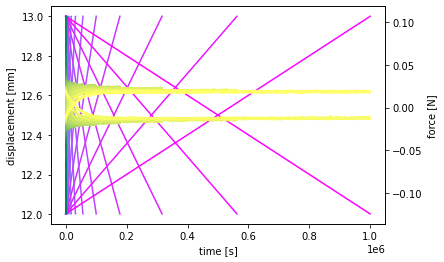

In [21]:
_ = proc_files(list_names, filter_type=4, filter_axis=1, anal_type='plot')

In [28]:
rheo_explog[(rheo_explog['Type'] == '0') & (rheo_explog['Axis'] == '1')]

,ID,Time,Type,Name,Force,Displacement,Speed,Period,Offset,RelOffset,...,StartedOn,EndedOn,StartPos,EndPos,StartForce,EndForce,Trigger,Active,Axis,StrainControlled
34,1,289.767,0,02_StrainSweep_1Hz_000,<err>,0.01,0.0628319,1,0,1,...,279.53,289.721,12.0007,12.0007,0.0184973,0.0120685,0,1,1,1
35,2,300.03,0,02_StrainSweep_1Hz_001,<err>,0.0125893,0.0791006,1,0,1,...,289.786,299.985,12.0007,12.0007,0.0126225,0.0100543,0,1,1,1
36,3,310.266,0,02_StrainSweep_1Hz_002,<err>,0.0158489,0.0995818,1,0,1,...,300.046,310.221,12.0007,12.0007,0.0100375,0.00913114,0,1,1,1
37,4,320.515,0,02_StrainSweep_1Hz_003,<err>,0.0199526,0.125366,1,0,1,...,310.28,320.469,12.0006,12.0007,0.00845973,0.00802332,0,1,1,1
38,5,330.829,0,02_StrainSweep_1Hz_004,<err>,0.0251189,0.157826,1,0,1,...,320.556,330.782,12.0006,12.0006,0.00674764,0.00542161,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,17,1207.72,0,223_Relax_016,<err>,0.0251189,0.157826,1,0,1,...,1204.5,1207.69,12.0021,12.0021,-0.00129246,-0.00157781,0,1,1,1
2240,18,1210.9,0,223_Relax_017,<err>,0.0199526,0.125366,1,0,1,...,1207.73,1210.88,12.0021,12.0021,-0.000537126,-0.00203101,0,1,1,1
2241,19,1214.11,0,223_Relax_018,<err>,0.0158489,0.0995818,1,0,1,...,1210.92,1214.08,12.0021,12.0021,8.39259e-05,0.000251778,0,1,1,1
2242,20,1217.3,0,223_Relax_019,<err>,0.0125893,0.0791006,1,0,1,...,1214.12,1217.27,12.0021,12.0021,0.000872829,-0.000553911,0,1,1,1


In [43]:
tlen = 8
DSS_1Hz_FTres = proc_files(list_names, filter_type=0, filter_axis=1, filter_name='StrainSweep_1Hz', anal_type='FT', anal_params={'nperiods':tlen})
np.savetxt(os.path.join(froot, 'DSS_1Hz_FTres_T' + str(tlen).zfill(2) + '.dat'), DSS_1Hz_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg')
DSS_0p1Hz_FTres = proc_files(list_names, filter_type=0, filter_axis=1, filter_name='StrainSweep_0.1Hz', anal_type='FT', anal_params={'nperiods':tlen})
np.savetxt(os.path.join(froot, 'DSS_0.1Hz_FTres_T' + str(tlen).zfill(2) + '.dat'), DSS_0p1Hz_FTres, delimiter='\t', 
            header='time\tamplitude\tperiod\toffset\tF_abs\tF_phase\tx_abs\tx_phase\tk_abs\tk_phase\tk_real\tk_imag\tF_avg')

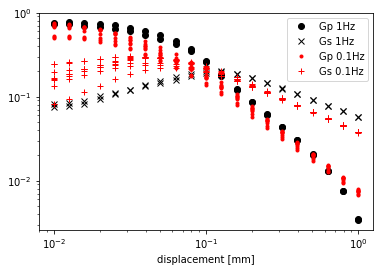

In [46]:
fig, ax = plt.subplots()
ax.plot(DSS_1Hz_FTres[:,1], DSS_1Hz_FTres[:,10], 'ko', label='Gp 1Hz')
ax.plot(DSS_1Hz_FTres[:,1], DSS_1Hz_FTres[:,11], 'kx', label='Gs 1Hz')
ax.plot(DSS_0p1Hz_FTres[:,1], DSS_0p1Hz_FTres[:,10], 'r.', label='Gp 0.1Hz')
ax.plot(DSS_0p1Hz_FTres[:,1], DSS_0p1Hz_FTres[:,11], 'r+', label='Gs 0.1Hz')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('displacement [mm]')
ax.legend()

Analyze OSR oscillatory rheology

In [ ]:
TO BE DONE!